In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv("/content/drive/Shareddrives/SI670 Final_Proj/transactions.csv")

In [4]:
df.head()

,OBJECTID,AGENCY,TRANSACTION_DATE,TRANSACTION_AMOUNT,VENDOR_NAME,VENDOR_STATE_PROVINCE,MCC_DESCRIPTION
0,481,Department of Youth Rehabilitation Services,2009-01-06T00:00:00.000Z,977.00,MY SAFE FOOD HANDLER,MD,Business Services Not Elsewhere Classified
1,482,Department of Youth Rehabilitation Services,2009-01-06T00:00:00.000Z,-25.61,AMES SAFETY ENVELOPE C,MA,Miscellaneous Publishing And Printing
2,483,DC Public Library,2009-01-07T00:00:00.000Z,1035.29,WWW.AIA.ORG,DC,"Membership Organizations, Not Elsewhere Classi..."
3,484,Office of the State Superintendent of Education,2009-01-06T00:00:00.000Z,222.40,DELTA 00675274330522,TN,Delta
4,485,Office of the State Superintendent of Education,2009-01-06T00:00:00.000Z,222.40,DELTA 00675274330500,TN,Delta


In [5]:
df['Date'] = df['TRANSACTION_DATE'].apply(lambda x: x.split('T')[0])

In [6]:
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
df_2009 = df[df['Date'].dt.year==2009].drop(['OBJECTID',
                                            'TRANSACTION_DATE',
                                            'VENDOR_STATE_PROVINCE',
                                            'VENDOR_NAME',
                                            'MCC_DESCRIPTION'], axis=1)
df_2009.head()

,AGENCY,TRANSACTION_AMOUNT,Date
0,Department of Youth Rehabilitation Services,977.00,2009-01-06
1,Department of Youth Rehabilitation Services,-25.61,2009-01-06
2,DC Public Library,1035.29,2009-01-07
3,Office of the State Superintendent of Education,222.40,2009-01-06
4,Office of the State Superintendent of Education,222.40,2009-01-06


# Sampling from marginal distributions

## Get samples for the 'TRANSACTION_AMOUNT' column

In [8]:
df_2009['TRANSACTION_AMOUNT'].describe()

count    28235.000000
mean       553.369125
std        846.664704
min      -7465.380000
25%         77.075000
50%        267.570000
75%        720.975000
max      44303.200000
Name: TRANSACTION_AMOUNT, dtype: float64

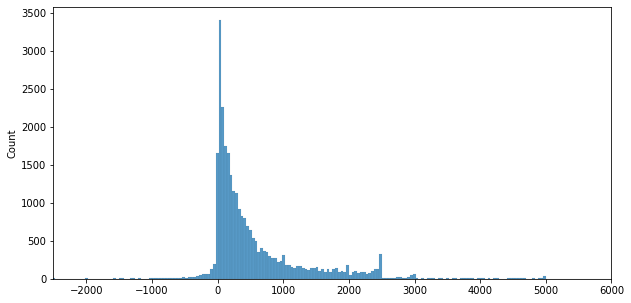

In [9]:
plt.rcParams["figure.figsize"] = (10,5)
fig, ax = plt.subplots()
sns.histplot(df_2009['TRANSACTION_AMOUNT'].values, ax=ax)
ax.set_xlim(-2500, 6000)
plt.show()

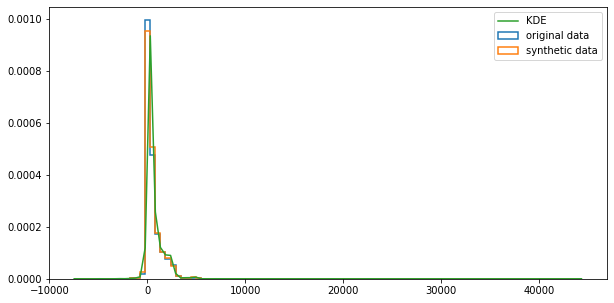

In [10]:
# Get the original empirical data from the 'TRANSACTION_AMOUNT' column
trans_amount_data = df_2009['TRANSACTION_AMOUNT'].values

# Generate a KDE from the empirical sample
trans_amount_pdf = scipy.stats.gaussian_kde(trans_amount_data)

# Sample new/synthetic datapoints from the KDE
trans_amount_syn_data = trans_amount_pdf.resample(len(df_2009)).T[:,0]

# Histogram of initial empirical sample
cnts, bins, p = plt.hist(trans_amount_data, label='original data', bins=100,
                         histtype='step', linewidth=1.5, density=True)

# Histogram of datapoints sampled from KDE
plt.hist(trans_amount_syn_data, label='synthetic data', bins=bins,
         histtype='step', linewidth=1.5, density=True)

# Visualize the kde itself
y_kde = trans_amount_pdf(bins)
plt.plot(bins, y_kde, label='KDE')
plt.legend()

plt.show(block=False)

In [11]:
trans_amount_syn_data

array([ 57.64284212, 374.89315135, 235.26737246, ...,  30.55460276,
       675.92999156, 293.3433191 ])

## Get samples for the 'Date' column

In [12]:
date_count = df_2009['Date'].value_counts()
date_count

2009-09-25    261
2009-09-24    232
2009-09-18    195
2009-09-17    193
2009-02-12    185
             ... 
2009-06-07      2
2009-12-26      2
2009-12-27      2
2009-08-09      2
2009-03-01      1
Name: Date, Length: 363, dtype: int64

In [13]:
sum(date_count) == len(df_2009)

True

In [14]:
dates = df_2009[['Date']]
dates

,Date
0,2009-01-06
1,2009-01-06
2,2009-01-07
3,2009-01-06
4,2009-01-06
...,...
42995,2009-12-02
42996,2009-12-02
42997,2009-12-01
42998,2009-12-01


In [15]:
dates['date_prob'] = dates['Date'].apply(lambda x: date_count[date_count.index.get_loc(x)]/len(dates))
dates.head()

<ipython-input-15-ffae908e010b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dates['date_prob'] = dates['Date'].apply(lambda x: date_count[date_count.index.get_loc(x)]/len(dates))


,Date,date_prob
0,2009-01-06,0.004073
1,2009-01-06,0.004073
2,2009-01-07,0.003400
3,2009-01-06,0.004073
4,2009-01-06,0.004073


In [16]:
dates = dates.sort_values(by='date_prob')
dates

,Date,date_prob
4861,2009-03-01,0.000035
18615,2009-08-09,0.000071
18517,2009-08-09,0.000071
26732,2009-12-26,0.000071
23191,2009-12-27,0.000071
...,...,...
21056,2009-09-25,0.009244
21055,2009-09-25,0.009244
21054,2009-09-25,0.009244
21088,2009-09-25,0.009244


In [17]:
dates = dates[['Date', 'date_prob']].drop_duplicates()

In [18]:
dates['date_cum_prob'] = np.cumsum(dates['date_prob'])

In [19]:
le = LabelEncoder()
dates['class_label'] = le.fit_transform(dates['Date'].astype('category'))
dates

,Date,date_prob,date_cum_prob,class_label
4861,2009-03-01,0.000035,0.000035,57
18615,2009-08-09,0.000071,0.000106,218
26732,2009-12-26,0.000071,0.000177,357
23191,2009-12-27,0.000071,0.000248,358
12022,2009-06-07,0.000071,0.000319,155
...,...,...,...,...
1502,2009-02-12,0.006552,0.968798,40
20681,2009-09-17,0.006835,0.975633,257
20552,2009-09-18,0.006906,0.982539,258
21622,2009-09-24,0.008217,0.990756,264


In [20]:
def sample_categorical(thetas, class_matrix, n_samples):
  """
  parameters:
    thetas: a list of probabilities corresponding to each class
    n_samples: number of samples that will be generated
  """
  n_classes = len(thetas)
  thetas_cumsum = np.cumsum(thetas) # calculate the empirical CDF
  uniform_samples = np.random.rand(n_samples) # randomly sample numbers from a uniform distribution [0,1]
  lower_than_limits = [uniform_samples <= limit for limit in thetas_cumsum]
  samples_generated = np.select(condlist=lower_than_limits, choicelist=class_matrix)

  return samples_generated

In [21]:
date_generated_labels = sample_categorical(dates['date_prob'], dates['class_label'], len(df_2009))
date_syn_data = le.inverse_transform(date_generated_labels)
date_syn_data

array(['2009-04-30T00:00:00.000000000', '2009-09-02T00:00:00.000000000',
       '2009-09-16T00:00:00.000000000', ...,
       '2009-03-25T00:00:00.000000000', '2009-06-25T00:00:00.000000000',
       '2009-06-03T00:00:00.000000000'], dtype='datetime64[ns]')

## Get samples for the 'AGENCY' column

In [22]:
agency = df_2009[['AGENCY']]
agency

,AGENCY
0,Department of Youth Rehabilitation Services
1,Department of Youth Rehabilitation Services
2,DC Public Library
3,Office of the State Superintendent of Education
4,Office of the State Superintendent of Education
...,...
42995,Fire & Emergency Medical Services
42996,Department of Employment Services
42997,District Department of Transportation
42998,District Department of Transportation


In [23]:
agency_count = agency['AGENCY'].value_counts()

In [24]:
agency['agency_prob'] = agency['AGENCY'].apply(lambda x: agency_count[agency_count.index.get_loc(x)]/len(agency))
agency = agency.sort_values(by='agency_prob')
agency

<ipython-input-24-1133ef997f28>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agency['agency_prob'] = agency['AGENCY'].apply(lambda x: agency_count[agency_count.index.get_loc(x)]/len(agency))


,AGENCY,agency_prob
42963,Office of Veterans Affairs,0.000319
1775,Office of Veterans Affairs,0.000319
8839,Office of Veterans Affairs,0.000319
1460,Office of Veterans Affairs,0.000319
25724,Office of Veterans Affairs,0.000319
...,...,...
5258,Fire & Emergency Medical Services,0.107349
5259,Fire & Emergency Medical Services,0.107349
5273,Fire & Emergency Medical Services,0.107349
6481,Fire & Emergency Medical Services,0.107349


In [25]:
agency = agency[['AGENCY', 'agency_prob']].drop_duplicates()

In [26]:
agency

,AGENCY,agency_prob
42963,Office of Veterans Affairs,0.000319
8579,Office of Employee Appeals,0.000496
15122,Judicial Nomination Commission,0.000496
3827,Advisory Neighborhood Commission,0.000531
13459,Office of Justice Grants Administration,0.000638
...,...,...
9857,Department on Disability Services,0.044130
17502,Metropolitan Police Department,0.055392
6880,District Department of Transportation,0.070055
13526,Department of Health,0.073136


In [27]:
agency['agency_cum_prob'] = np.cumsum(agency['agency_prob'])
agency

,AGENCY,agency_prob,agency_cum_prob
42963,Office of Veterans Affairs,0.000319,0.000319
8579,Office of Employee Appeals,0.000496,0.000815
15122,Judicial Nomination Commission,0.000496,0.001310
3827,Advisory Neighborhood Commission,0.000531,0.001842
13459,Office of Justice Grants Administration,0.000638,0.002479
...,...,...,...
9857,Department on Disability Services,0.044130,0.694068
17502,Metropolitan Police Department,0.055392,0.749460
6880,District Department of Transportation,0.070055,0.819515
13526,Department of Health,0.073136,0.892651


In [28]:
le = LabelEncoder()
agency['agency_label'] = le.fit_transform(agency['AGENCY'])

In [29]:
agency_generated_labels = sample_categorical(agency['agency_prob'], agency['agency_label'], len(df_2009))
agency_syn_data = le.inverse_transform(agency_generated_labels)
agency_syn_data

array(['District Department of Transportation',
       'Office of the Inspector General',
       'Department on Disability Services', ...,
       'Office of Latino Affairs', 'Metropolitan Police Department',
       'Department of Health Care Finance'], dtype=object)

## Combine the generated columns as a data frame

In [30]:
syn_df = pd.DataFrame()
syn_df['AGENCY'] = agency_syn_data
syn_df['TRANSACTION_AMOUNT'] = trans_amount_syn_data
syn_df['Date'] = date_syn_data
syn_df

,AGENCY,TRANSACTION_AMOUNT,Date
0,District Department of Transportation,57.642842,2009-04-30
1,Office of the Inspector General,374.893151,2009-09-02
2,Department on Disability Services,235.267372,2009-09-16
3,Office of the Chief Medical Examiner,46.429841,2009-08-25
4,Department of Corrections,-115.525027,2009-08-05
...,...,...,...
28230,Fire & Emergency Medical Services,411.658150,2009-03-06
28231,Fire & Emergency Medical Services,133.748760,2009-08-07
28232,Office of Latino Affairs,30.554603,2009-03-25
28233,Metropolitan Police Department,675.929992,2009-06-25


In [31]:
syn_df.to_csv('baseline_syn_data.csv', index=False)